In [2]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

#Loads the VGG16 model 
model = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

In [3]:
# Let's print our layers 
for (i,layer) in enumerate(model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer True
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


In [4]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

# Re-loads the VGG16 model without the top or FC layers
model = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in model.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [24]:
def addTopModel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.25)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [25]:
model.input

<tf.Tensor 'input_2:0' shape=(None, 224, 224, 3) dtype=float32>

In [26]:
model.layers

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

num_classes = 2

FC_Head = addTopModel(model, num_classes)

modelnew = Model(inputs=model.input, outputs=FC_Head)

print(modelnew.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [28]:
from keras.preprocessing.image import ImageDataGenerator

#train_data_dir = '/home/gehu/Downloads/Untitled Folder 3/EXTERNALEYE DISEASES/Eye Diseases Vol.1/train3'
#validation_data_dir = '/home/gehu/Downloads/Untitled Folder 3/EXTERNALEYE DISEASES/Eye Diseases Vol.1/test1'

train_data_dir = 'D:/Amit/Umang Data/24 Aug 2021/Train'
validation_data_dir = 'D:/Amit/Umang Data/24 Aug 2021/Test'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 10
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 520 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [31]:
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model.h5",
                             monitor="val_accuracy",
                             mode="max",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_accuracy', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]                 


# Note we use a very small learning rate 
modelnew.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 520
nb_validation_samples =120
epochs = 25
batch_size = 10

history = modelnew.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
   # callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

modelnew.save("model.h5")

Epoch 1/25
52/52 [==============================] - 88s 2s/step - loss: 0.5746 - accuracy: 0.7288 - val_loss: 0.8204 - val_accuracy: 0.5917
Epoch 2/25
52/52 [==============================] - 94s 2s/step - loss: 0.5461 - accuracy: 0.7308 - val_loss: 0.5676 - val_accuracy: 0.7417
Epoch 3/25
52/52 [==============================] - 97s 2s/step - loss: 0.5195 - accuracy: 0.7385 - val_loss: 0.7386 - val_accuracy: 0.6667
Epoch 4/25
52/52 [==============================] - 230s 4s/step - loss: 0.5790 - accuracy: 0.7308 - val_loss: 0.4332 - val_accuracy: 0.8417
Epoch 5/25
52/52 [==============================] - 99s 2s/step - loss: 0.5607 - accuracy: 0.7154 - val_loss: 0.7298 - val_accuracy: 0.6833
Epoch 6/25
52/52 [==============================] - 112s 2s/step - loss: 0.4838 - accuracy: 0.7654 - val_loss: 0.7839 - val_accuracy: 0.6583
Epoch 7/25
52/52 [==============================] - 366s 7s/step - loss: 0.5079 - accuracy: 0.7481 - val_loss: 0.9778 - val_accuracy: 0.5083
Epoch 8/25
52/52 

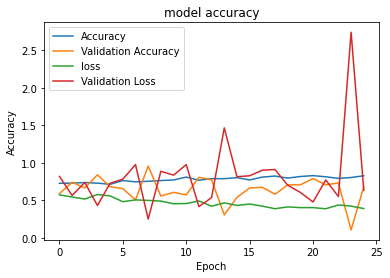

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()